## Hipótesis: "Los ataques mortales de tiburón disminuyen mientras alguna película sobre tiburones está en cartelera"

## Bibliotecas y módulos importados

In [2]:
import pandas as pd

import re as regex

from src.functions import *

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



## Importación de CSV principal 

In [3]:
df = pd.read_csv("Inputs/Dataset_Shark_Attacks.csv", encoding = "ISO-8859-1")

# pd.set_option('display.max_rows', 6000)
# pd.set_option('display.max_columns', 500)

# display(df)


In [4]:
#Observamos la envergadura y principales detalles del Dataset

#display(f"La dimensión del dataset son {df.shape[0]} filas y {df.shape[1]} columnas, mientras que sus columnas son: {list(df.columns)}")

# df.head(5)

# df.tail(5)

# df.shape

# df.columns

## Tratamiento de filas y columnas principales

**Renombrado de columnas**

In [5]:
renaming = {df.columns[9]: 'Género'}

df2 = df.rename(columns=renaming)

df3 = df2.rename(columns={'Case Number':'Casos','Date':'Fecha','Year':'Años','Type':'Ataque', 'Country':'País', 'Area':'Área', 'Location':'Localización','Activity':'Actividad', 'Age':'Edad', 'Injury':'Herida', 'Fatal (Y/N)':'Mortalidad'})


**Selección y ordenación de columnas**

In [6]:
df4 = df3[['Casos','Fecha','Años','Ataque','País','Área','Localización','Actividad','Género','Edad','Herida','Mortalidad']]

**Reparación y limpieza de columna "Casos"**

In [7]:

df4.Caso = df4["Casos"].astype(str).apply(case_filtering).dropna()


**Comprobación inicial de resultados**

In [8]:
df4 = df4[["Años","Casos","Género", "Mortalidad"]]

df4.sort_values("Años",ascending=False).dropna().set_index("Años")

df4.head(3)

,Años,Casos,Género,Mortalidad
0,2016,2016.09.18.c,M,N
1,2016,2016.09.18.b,M,N
2,2016,2016.09.18.a,M,N


**Reparación y limpieza de columna "Mortalidad"**

In [9]:
df4.Mortalidad = df4["Mortalidad"].astype(str)

df4.Mortalidad.dtypes



dtype('O')

In [10]:


df4.Mortalidad = df4["Mortalidad"].astype(str).apply(m_correction)

df4.loc[df4['Mortalidad'] == "0"]

df4.head(3)




,Años,Casos,Género,Mortalidad
0,2016,2016.09.18.c,M,0
1,2016,2016.09.18.b,M,0
2,2016,2016.09.18.a,M,0


**Selección de casos entre el año 1900 hasta el 2016**

In [11]:
df4 = df4.iloc[0:5325].dropna()

df4.head(3)

,Años,Casos,Género,Mortalidad
0,2016,2016.09.18.c,M,0
1,2016,2016.09.18.b,M,0
2,2016,2016.09.18.a,M,0


**Arreglos de formato en columnas variadas**

In [12]:
df4["Mortalidad"] = df4["Mortalidad"].astype("int64")

df4["Género"] = df4["Género"].astype(str)


**Disgregacón de columna "Género" en "Hombres" y "Mujeres"**

In [13]:
df4['Hombres'] = df4.Género.apply(lambda x: x=="M")

df4['Mujeres'] = df4.Género.apply(lambda x: x=="F")

df4 = df4[["Años","Casos","Hombres","Mujeres","Mortalidad"]]

def genero_fixing(x):

    if x == True:
        return 1

    else:
        return 0


df4['Mujeres'] = df4.Mujeres.apply(genero_fixing)

df4['Hombres'] = df4.Hombres.apply(genero_fixing)

df4.head(3)

,Años,Casos,Hombres,Mujeres,Mortalidad
0,2016,2016.09.18.c,1,0,0
1,2016,2016.09.18.b,1,0,0
2,2016,2016.09.18.a,1,0,0


**Agrupación de años en función de diferentes cálculos**

In [14]:
df4 = df4.groupby(["Años"]).agg({'Casos':'count', 'Hombres': 'sum', 'Mujeres': 'sum', 'Mortalidad':'sum'}).dropna().reset_index()

df4.head(3)

,Años,Casos,Hombres,Mujeres,Mortalidad
0,1848,1,1,0,1
1,1900,11,11,0,5
2,1901,7,7,0,3


In [15]:
df5 = df4

df5.reset_index()

df5.head(3)


,Años,Casos,Hombres,Mujeres,Mortalidad
0,1848,1,1,0,1
1,1900,11,11,0,5
2,1901,7,7,0,3


## Importación de CSV secundario

In [16]:
fd = pd.read_csv("Inputs/Dataset_Movies.csv", encoding = "ISO-8859-1")


**Visión inicial de columnas en dataset secundario**

In [17]:
fd.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Renombrar columnas de csv secundario**

In [18]:
fd2 = fd.rename(columns = {"release_date":"Lanzamiento","original_title":"Título"})

fd3 = fd2[["Lanzamiento","Título"]]

## Tratamiento de filas y columnas secundarias

**Extracción de columna "Años" a través de la columna "Lanzamiento" a través de función ya creada**

In [19]:
fd3.Lanzamiento = fd3["Lanzamiento"].astype(str).apply(case_filtering)


**Selección de películas de tiburones y preparación inicial de index común**

In [20]:
# fd4[fd4['Título'].astype(str).str.contains("shark")]

fd3.Título = fd3["Título"].astype(str).apply(find_word)

fd4 = fd3.dropna(axis=0, subset=['Lanzamiento', 'Título'])

fd4["Años"] =  fd4["Lanzamiento"].astype(str).apply(extract_year)

fd4["Años"] = fd4["Años"].astype(int)

fd4.head(3)



,Lanzamiento,Título,Años
318,10-09-1994,swimming with sharks,1994
1338,18-06-1975,jaws,1975
1339,16-06-1978,jaws 2,1978


**Creación de tabla final de csv secundario**

In [21]:
fd4 = fd4[["Años", "Lanzamiento", "Título"]]

fd4.sort_values("Años", ascending=False).dropna().reset_index()

fd4.head(3)

# .set_index("Años")

,Años,Lanzamiento,Título
318,1994,10-09-1994,swimming with sharks
1338,1975,18-06-1975,jaws
1339,1978,16-06-1978,jaws 2


**Agrupación de años en tabla secundaria**

In [22]:
fd6 = fd4.groupby(["Años"]).count().dropna().reset_index()

fd6.head(3)


,Años,Lanzamiento,Título
0,1932,1,1
1,1936,1,1
2,1950,1,1


## Fusión de Dataframes tratados previamente

In [23]:
dfinal = pd.merge(df5, fd6, on="Años",how="outer")

pd.options.display.float_format = '{:,.0f}'.format
dfinal

dfinal2 = dfinal.fillna(0)

pd.set_option('display.max_rows', 150)

dfinal2.head(3)

,Años,Casos,Hombres,Mujeres,Mortalidad,Lanzamiento,Título
0,1848,1,1,0,1,0,0
1,1900,11,11,0,5,0,0
2,1901,7,7,0,3,0,0


## Tabla Final 

In [24]:
dfinal3 = dfinal2[['Años', 'Casos', 'Hombres', 'Mujeres', 'Mortalidad', 'Título']]

dfinal3.set_index("Años").iloc[1::]



,Casos,Hombres,Mujeres,Mortalidad,Título
Años,,,,,
1900,11,11,0,5,0
1901,7,7,0,3,0
1902,15,15,0,7,0
1903,10,10,0,8,0
1904,13,13,0,9,0
1905,14,14,0,9,0
1906,21,21,0,14,0
1907,23,20,3,13,0
1908,11,9,1,10,0


## Análisis estadísticos alternativos 

In [25]:
# means = dfinal2.groupby('Mortalidad')["Título"].mean()

# means

In [26]:
dfinal3['Hombres'].corr(dfinal2['Mortalidad'])

0.4956620740884708

In [27]:
dfinal3['Mujeres'].corr(dfinal2['Mortalidad'])

0.2588838224072595

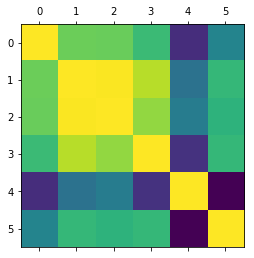

In [28]:
plt.matshow(dfinal3.corr(method='pearson'))

plt.show()

In [29]:
# rating_probs = dfinal3.groupby('Mortalidad').size().div(len(dfinal3))

# dfinal3.groupby(['Hombres', 'Mortalidad']).size().fillna(0).div(len(df)).div(rating_probs, axis=0, level='Mortalidad')

# mux = pd.MultiIndex.from_product([dfinal3['Mortalidad'].unique(), dfinal3['Hombres'].unique()]) 

# s = (dfinal3.groupby(['Mortalidad', 'Hombres']).count() / dfinal3.groupby('Mortalidad').count())['Mujeres'] 

# s = s.reindex(mux, fill_value=0)

In [30]:
#dfinal2.to_csv('Relación.csv', header = False, index = False)

## Correlación que responde a la hipótesis inicial

In [31]:
dfinal3['Mortalidad'].corr(dfinal2['Título'])

0.13024309768634132

# Conclusión

### La relación entre la mortalidad humana debido a ataques de tiburones presenta una correlación neutra con la emisión de películas del mismo ámbito.